O objetivo deste desafio é reduzir o erro médio quadrático!

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"italoventura","key":"7a845db0a8431c7294925753816fafcc"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 68 Feb  9 02:42 kaggle.json
{"username":"italoventura","key":"7a845db0a8431c7294925753816fafcc"}

In [ ]:
!kaggle competitions download -c tabular-playground-series-feb-2021

 87% 35.0M/40.2M [00:01<00:00, 7.01MB/s]
100% 40.2M/40.2M [00:01<00:00, 22.0MB/s]
  0% 0.00/470k [00:00<?, ?B/s]
100% 470k/470k [00:00<00:00, 65.1MB/s]
 68% 17.0M/25.1M [00:01<00:01, 5.45MB/s]
100% 25.1M/25.1M [00:01<00:00, 15.7MB/s]


In [ ]:
!unzip sample_submission.csv.zip
!unzip test.csv.zip
!unzip train.csv.zip


Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   
Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               


In [ ]:
sample_submission = pd.read_csv("/content/sample_submission.csv")
data_test = pd.read_csv("/content/test.csv")
data_train = pd.read_csv("/content/train.csv")

In [ ]:
data_train

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,A,B,A,A,B,D,A,E,C,I,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,B,A,A,A,B,B,A,E,A,F,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,A,A,A,C,B,D,A,B,C,N,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,A,A,A,C,B,D,A,E,G,K,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,A,B,A,A,B,B,A,E,C,F,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,499993,A,B,A,C,B,B,A,E,E,L,0.260716,0.712438,0.161661,0.442794,0.768447,0.269578,0.258655,0.363598,0.300619,0.340516,0.235711,0.383477,0.215227,0.793630,8.343538
299996,499996,A,B,A,C,B,B,A,E,E,L,0.173302,0.121591,0.592514,0.193711,0.775951,0.197211,0.257024,0.574304,0.227035,0.322583,0.286094,0.324874,0.306933,0.230902,7.851861
299997,499997,A,B,A,C,B,B,A,E,C,M,0.342856,0.617869,0.462991,0.418098,0.297406,0.449482,0.386172,0.476217,0.135947,0.502730,0.235788,0.316671,0.250286,0.349041,7.600558
299998,499998,A,B,B,C,B,B,A,D,E,F,0.599403,0.686054,0.660860,0.187199,0.758642,0.363130,0.324132,0.229017,0.220888,0.515304,0.389391,0.245234,0.303895,0.481138,8.272095


In [ ]:
data_test

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,A,B,A,C,B,D,A,E,E,G,0.331261,0.551131,0.486284,0.156058,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448
1,5,A,B,A,C,B,D,A,E,C,L,0.402404,0.617546,0.296852,0.187440,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251
2,15,A,B,A,C,B,D,A,E,C,F,0.530677,0.618126,0.760865,0.199872,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572,0.273905
3,16,A,A,B,A,B,D,A,E,E,F,0.439653,0.487403,0.715786,0.192808,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.589080,0.311625
4,17,A,B,A,A,B,B,A,E,E,I,0.389844,0.752760,0.315269,0.191734,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.285860,0.794931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,499987,A,A,A,C,B,D,A,E,G,L,0.919265,0.111147,0.199583,0.181354,0.277365,0.963678,0.240482,0.686462,0.915165,0.848878,0.459598,0.590327,0.864873,0.425258
199996,499990,A,A,A,C,B,D,A,E,E,F,0.362875,-0.020197,0.469025,0.336185,0.523174,0.232072,0.363421,0.694092,0.137002,0.319465,0.364527,0.388908,0.664357,0.224215
199997,499991,A,A,A,C,B,D,A,E,C,K,0.463060,0.740421,0.446293,0.411387,0.517103,0.432927,0.811876,0.328398,0.496017,0.538779,0.466338,0.643869,0.749590,0.457702
199998,499994,A,B,A,A,B,D,A,E,C,F,0.708709,0.418490,0.193004,0.862700,0.279153,0.837712,0.680886,0.534439,0.501588,0.809053,0.631704,0.766426,0.937139,0.796304


Não há valores nulos nos dados de treinamento e nos dados de teste

In [ ]:
data_train.isna().value_counts()

id     cat0   cat1   cat2   cat3   cat4   cat5   cat6   cat7   cat8   cat9   cont0  cont1  cont2  cont3  cont4  cont5  cont6  cont7  cont8  cont9  cont10  cont11  cont12  cont13  target
False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False   False   False   False   False     300000
dtype: int64

In [ ]:
data_test.isna().value_counts()

cat0   cat1   cat2   cat3   cat4   cat5   cat6   cat7   cat8   cat9   cont0  cont1  cont2  cont3  cont4  cont5  cont6  cont7  cont8  cont9  cont10  cont11  cont12  cont13
False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False   False   False   False     200000
dtype: int64

------------------------------- TASKS ----------------------------

Aprender a usar o Pycaret

## EDA

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

<Figure size 1440x864 with 0 Axes>

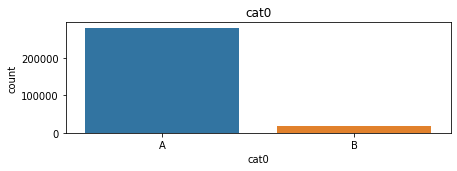

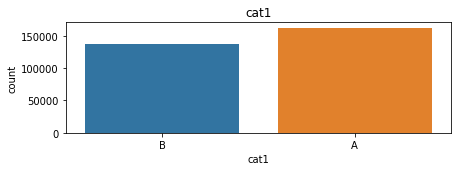

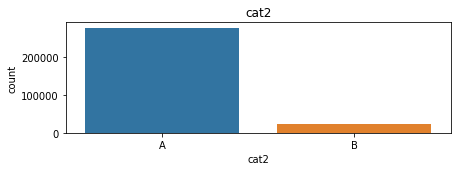

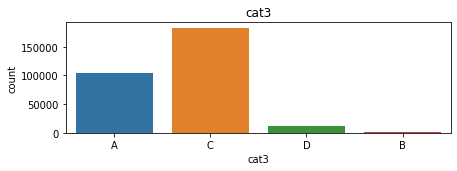

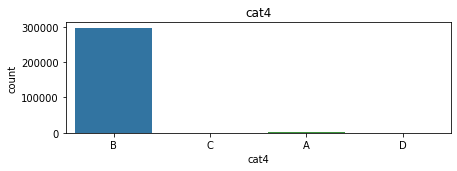

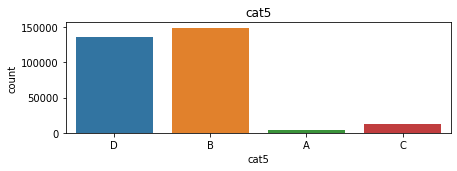

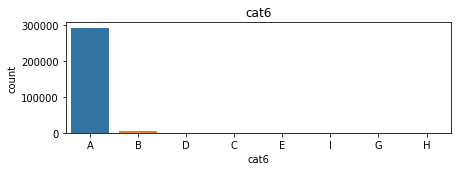

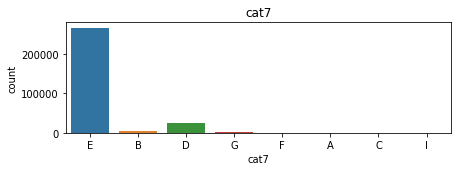

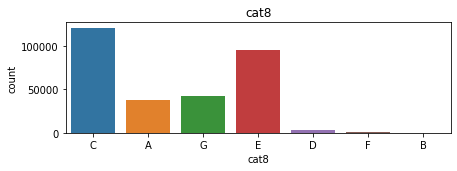

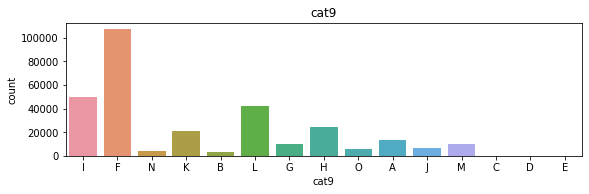

In [ ]:
colunas = ["cat0", "cat1","cat2",	"cat3",	"cat4",	"cat5",	"cat6",	"cat7",	"cat8", "cat9"]
plt.figure(figsize=(20, 12))
for i in range(len(colunas)):
  plt.figure(figsize=(40, 24))
  plt.subplot(10, 5, i+1)
  plt.title(colunas[i])
  sns.countplot(data_train[colunas[i]])
plt.tight_layout()
plt.show()

In [ ]:
colunas = ["cat0", "cat1", "cat2", "cat3",	"cat4",	"cat5",	"cat6",	"cat7",	"cat8", "cat9"]
plt.figure(figsize=(20, 12))
for i in colunas:
  plt.figure(figsize=(40, 24))
  # plt.subplot(10, 5, colunas[i]+1)
  # plt.title(colunas[i])
  sns.catplot(data_train[[i]])
plt.tight_layout()
plt.show()

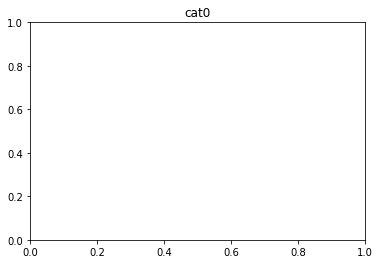

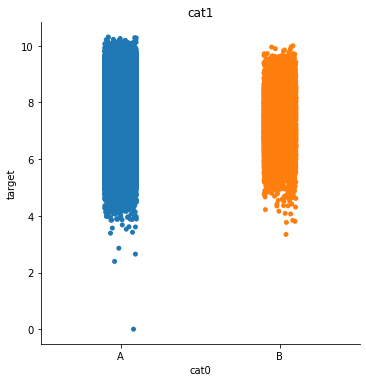

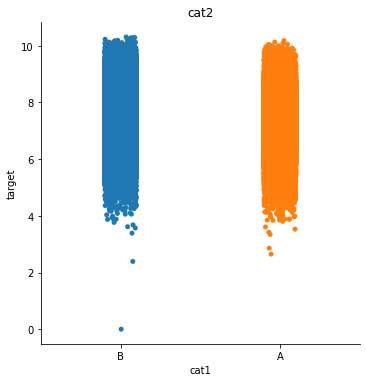

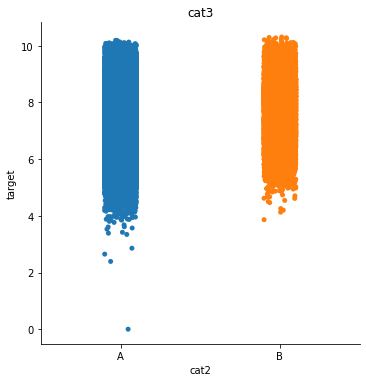

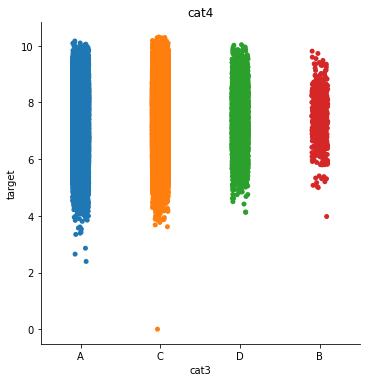

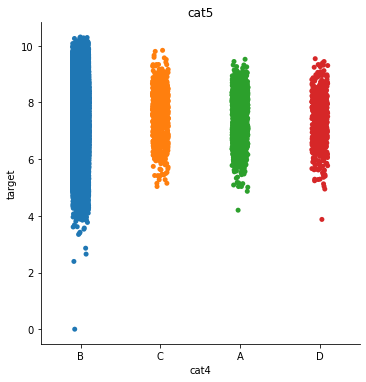

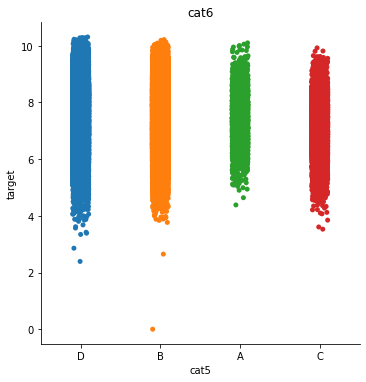

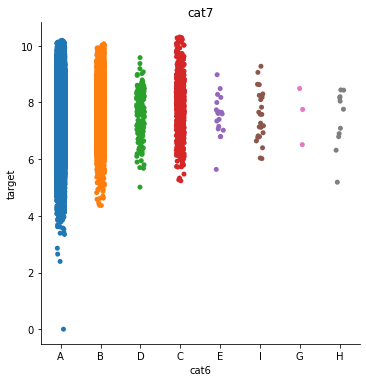

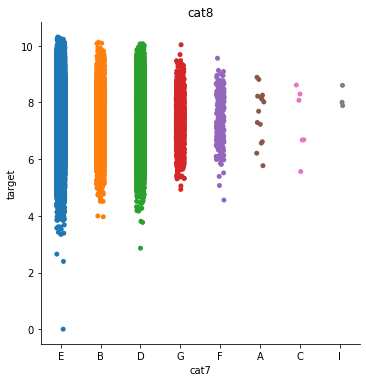

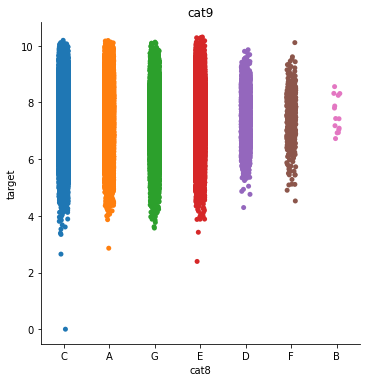

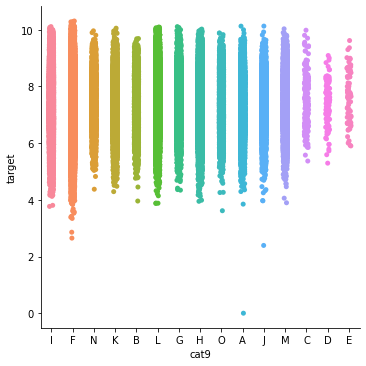

In [ ]:
for i in colunas:
  plt.figure(figsize=(40, 24))
  plt.subplot(10, 5, colunas[i]+1)
  plt.title(i)
  sns.catplot(x=i, y="target", data=data_train)


In [ ]:
sns.boxplot(data_train["cat0"])

## Data Engineering

In [ ]:
data_train.drop(["id"], axis=1, inplace=True)
data_test.drop(["id"], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
colunas = ["cat0", "cat1", "cat2",	"cat3",	"cat4",	"cat5",	"cat6",	"cat7",	"cat8", "cat9"]
for i in colunas:
  data_train[i] = encoder.fit_transform(data_train[i])
  data_test[i] = encoder.fit_transform(data_test[i])


In [ ]:
data_train = pd.get_dummies(data_train, columns=["cat0", "cat1",	"cat2",	"cat3",	"cat4",	"cat5",	"cat6",	"cat7",	"cat8", "cat9"])
data_test = pd.get_dummies(data_test, columns=["cat0", "cat1",	"cat2",	"cat3",	"cat4",	"cat5",	"cat6",	"cat7",	"cat8", "cat9"])

In [ ]:
X = data_train.drop(["target", "cat6_7"], axis=1)
y = data_train["target"]

In [ ]:
X

In [ ]:
data_test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip install lightgbm

In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
import lightgbm as lgbm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, RandomizedSearchCV
import time

In [ ]:
cv_strat = StratifiedKFold(n_splits = 10)

In [ ]:
X_train

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cat0_0,cat0_1,cat1_0,cat1_1,cat2_0,cat2_1,cat3_0,cat3_1,cat3_2,cat3_3,cat4_0,cat4_1,cat4_2,cat4_3,cat5_0,cat5_1,cat5_2,cat5_3,cat6_0,cat6_1,cat6_2,cat6_3,cat6_4,cat6_5,cat6_6,cat6_7,cat7_0,cat7_1,cat7_2,cat7_3,cat7_4,cat7_5,cat7_6,cat7_7,cat8_0,cat8_1,cat8_2,cat8_3,cat8_4,cat8_5,cat8_6,cat9_0,cat9_1,cat9_2,cat9_3,cat9_4,cat9_5,cat9_6,cat9_7,cat9_8,cat9_9,cat9_10,cat9_11,cat9_12,cat9_13,cat9_14
254099,0.651627,0.758858,0.445606,0.228740,0.280175,0.635322,0.507048,0.337380,0.467015,0.337054,0.730467,0.314602,0.609534,0.805591,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
53461,0.500552,0.484890,0.459874,0.485199,0.475419,0.319549,0.378845,0.218947,0.414760,0.380008,0.384979,0.194889,0.589757,0.817879,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
247984,0.293818,0.689225,0.311407,0.208643,0.878872,0.386373,0.344559,0.297390,0.470661,0.369633,0.708858,0.607523,0.468808,0.678101,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
209067,0.833643,0.353748,0.433890,0.823988,0.507513,0.829573,0.864165,0.264959,0.906068,0.637926,0.804185,0.859877,0.855169,0.234274,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
185997,0.499693,0.791970,0.696113,0.613139,0.897020,0.401178,0.410749,0.344080,0.396157,0.472854,0.587960,0.382548,0.327158,0.400349,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.218591,0.134988,0.662657,0.245763,0.274016,0.609485,0.242897,0.244675,0.337680,0.326358,0.340959,0.315536,0.361444,0.355215,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
259178,0.317958,0.666808,0.645005,0.357515,0.277544,0.226717,0.497106,0.308617,0.476655,0.242522,0.698014,0.757678,0.648951,0.406966,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
131932,0.477097,0.673851,0.358404,0.751019,0.280375,0.382030,0.912317,0.587112,0.448978,0.448227,0.748775,0.741487,0.209404,0.712498,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
146867,0.277819,0.354847,0.801441,0.509487,0.374181,0.252294,0.396459,0.491125,0.321046,0.319039,0.373475,0.355155,0.660828,0.210733,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
random_state = 42
classifiers = [DecisionTreeRegressor(random_state),
               RandomForestRegressor(random_state),
               LinearRegression(random_state)]

cv_results = []
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    # y_pred = classifier.predict(X_test)
    # print(accuracy_score(y_pred, y_test))
    #cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = cv_strat, n_jobs=4))

# cv_means = []
# cv_std = []
# for cv_result in cv_results:
#     cv_means.append(cv_result.mean())
#     cv_std.append(cv_result.std())

# cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree",
# "RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","AdaBoost",
# "Naive Bayes", "XGBoost"]})


---


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from keras import backend
def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [ ]:
classifier_rna = Sequential()
classifier_rna.add(Dense(units = 24, activation = 'relu', input_dim = 24))
classifier_rna.add(Dense(units = 1, activation = 'sigmoid'))
classifier_rna.compile(optimizer = 'adam', loss = 'mse', metrics = [rmse])
classifier_rna.fit(X_train, y_train, batch_size = 32, epochs = 10)

In [ ]:
y_pred_lif = classifier_rna.predict(X_test)

In [ ]:
print(accuracy_score(y_pred_lif, y_test))

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred_lif, squared=False)
rmse

6.512952742366284

---

Linear Regression

In [ ]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
#print(lr_clf.score(y_pred, y_test))

---

Gradient Boosting Regressor

In [ ]:
GBC = GradientBoostingRegressor()
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)

---


LGBM

In [ ]:
import lightgbm as lgbm

In [ ]:
lgbm_regressor = lgbm.LGBMRegressor(objective='regression',
                                    max_depth = 3, 
                                    learning_rate = 0.2, 
                                    n_estimators = 450,
                                    min_child_samples = 20,
                                    num_leaves = 21
                                    )
lgbm_regressor.fit(X_train, y_train)
y_pred_lgbm_r = lgbm_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred_lgbm_r, squared=False)
rmse

0.8433890839370366

0.8439754625430659

objective='regression', max_depth = 3, learning_rate = 0.2, n_estimators = 300 - 0.8436277088893529


n_estimators = 350 - 0.8435154766772114

n_estimators = 450 - 0.8433920301942668

---

XG Boost - Aplicar Grid Search CV para buscar melhores parâmetros

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
xgb_r = XGBRegressor(objective='reg:squarederror', n_estimators = 100, learning_rate = 0.1)

# xgb_r.fit(X_train, y_train)
# y_pred_xgbr = xgb_r.predict(X_test)
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(xgb_r, X_train, y_train, cv=kfold)
#y_pred_xgbr_kfold = results.predict(X_test)


In [ ]:
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 7.47% (0.26%)


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred_xgbr, squared=False)
rmse

0.8442370318996729

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error, classification_report, confusion_matrix
import time
from sklearn.model_selection import StratifiedKFold, GridSearchCV, KFold

TESTAR COM ONE HOT ENCODING

In [ ]:
t1 = time.time()
cv_strat = StratifiedKFold(n_splits = 10)

hiperparam1 = {'objective': ["reg:squarederror"],
               'n_estimators':[100, 300, 500],
               'learning_rate':[0.1, 0.2],
               'max_depth':[1, 2, 3]}


mse = make_scorer(mean_squared_error)

#instânciando meu classificador
classifier1 = XGBRegressor()

#instanciando e modelando o grid search com os hiperparametros e a validação definidas.
grid_cv1_xgb_r = GridSearchCV(classifier1, hiperparam1, cv = 3, scoring = mse)
grid_cv1_xgb_r.fit(X_train, y_train)
t2 = time.time()
res = t2 - t1
print(res / 60)

45.508826855818434


In [ ]:
#vamos olhar para os melhores resultados encontrados pelo Grid Search
print('Melhor resultado f1:', grid_cv1_svc.best_score_)
print('\n\nMelhor configuração de hiperparâmetros:', grid_cv1_svc.best_params_)
print( '\n\nConfigurações de todos os hiperparâmetros do melhor estimado encontrado pelo GridSearch: \n', grid_cv1_svc.best_estimator_)

<Figure size 1440x864 with 0 Axes>

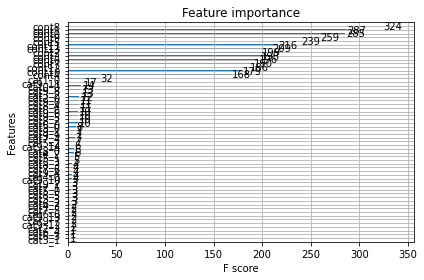

In [ ]:
plt.figure(figsize=(20, 12))
xgb.plot_importance(xgb_r)
plt.tight_layout()
plt.show()

---


In [ ]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.8533711291850826

• Linear Regression - Com somente as colunas de "cont", consegui bater o score de 0.88126, mas colocando as colunas "cat" e aplicando LabelEncoder nelas consegui bater 0.86 no modelo de treinamento

• Gradient Boosting Regressor - Score 08.53

##Usando no dataset de test

In [ ]:
data_test

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cat0_0,cat0_1,cat1_0,cat1_1,cat2_0,cat2_1,cat3_0,cat3_1,cat3_2,cat3_3,cat4_0,cat4_1,cat4_2,cat4_3,cat5_0,cat5_1,cat5_2,cat5_3,cat6_0,cat6_1,cat6_2,cat6_3,cat6_4,cat6_5,cat6_6,cat7_0,cat7_1,cat7_2,cat7_3,cat7_4,cat7_5,cat7_6,cat7_7,cat8_0,cat8_1,cat8_2,cat8_3,cat8_4,cat8_5,cat8_6,cat9_0,cat9_1,cat9_2,cat9_3,cat9_4,cat9_5,cat9_6,cat9_7,cat9_8,cat9_9,cat9_10,cat9_11,cat9_12,cat9_13,cat9_14
0,0.331261,0.551131,0.486284,0.156058,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0.402404,0.617546,0.296852,0.187440,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.530677,0.618126,0.760865,0.199872,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572,0.273905,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.439653,0.487403,0.715786,0.192808,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.589080,0.311625,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.389844,0.752760,0.315269,0.191734,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.285860,0.794931,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.919265,0.111147,0.199583,0.181354,0.277365,0.963678,0.240482,0.686462,0.915165,0.848878,0.459598,0.590327,0.864873,0.425258,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
199996,0.362875,-0.020197,0.469025,0.336185,0.523174,0.232072,0.363421,0.694092,0.137002,0.319465,0.364527,0.388908,0.664357,0.224215,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
199997,0.463060,0.740421,0.446293,0.411387,0.517103,0.432927,0.811876,0.328398,0.496017,0.538779,0.466338,0.643869,0.749590,0.457702,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
199998,0.708709,0.418490,0.193004,0.862700,0.279153,0.837712,0.680886,0.534439,0.501588,0.809053,0.631704,0.766426,0.937139,0.796304,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
id = pd.read_csv("/content/test.csv")
id = id["id"]

In [ ]:
previsao = lgbm_regressor.predict(data_test)
previsao = pd.Series(previsao, name="Previsão")
submission = pd.DataFrame({"Id": id, "target": previsao})
submission.to_csv("submission.csv", index=False)

In [ ]:
submission

,Id,target
0,0,7.550139
1,5,7.827831
2,15,7.574740
3,16,7.410421
4,17,7.253848
...,...,...
199995,499987,7.461026
199996,499990,7.245030
199997,499991,7.580754
199998,499994,7.403076


In [ ]:
!kaggle competitions submit -c tabular-playground-series-feb-2021 -f submission.csv -m "LGBM Regressor with One-Hot-Encoding"

100% 4.73M/4.73M [00:08<00:00, 570kB/s]
Successfully submitted to Tabular Playground Series - Feb 2021